<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Эффективность-обогащения" data-toc-modified-id="Эффективность-обогащения-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Эффективность обогащения</a></span></li><li><span><a href="#Признаки,-недоступные-в-тестовой-выборке." data-toc-modified-id="Признаки,-недоступные-в-тестовой-выборке.-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Признаки, недоступные в тестовой выборке.</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Предобработка данных</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Концентрация-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки" data-toc-modified-id="Концентрация-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Концентрация металлов (Au, Ag, Pb) на различных этапах очистки</a></span></li><li><span><a href="#Распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках" data-toc-modified-id="Распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Распределения размеров гранул сырья на обучающей и тестовой выборках</a></span></li><li><span><a href="#Суммарная-концентрация-всех-веществ-на-разных-стадиях" data-toc-modified-id="Суммарная-концентрация-всех-веществ-на-разных-стадиях-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Суммарная концентрация всех веществ на разных стадиях</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Функция-для-вычисления-итоговой-sMAPE" data-toc-modified-id="Функция-для-вычисления-итоговой-sMAPE-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Функция для вычисления итоговой sMAPE</a></span></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Линейная регрессия</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Случайный лес</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Тестирование модели</a></span></li></ul></li><li><span><a href="#Итоговый-вывод" data-toc-modified-id="Итоговый-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Итоговый вывод</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('max_columns', None)
random_state = 12345

In [3]:
try:
    data_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')  #обучающая выборка;
    data_test = pd.read_csv('/datasets/gold_recovery_test_new.csv') #тестовая выборка;
    data_full = pd.read_csv('/datasets/gold_recovery_full_new.csv') #исходные данные.
except:
    data_train = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_train_new.csv')  #обучающая выборка;
    data_test = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_test_new.csv') #тестовая выборка;
    data_full = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_full_new.csv') #исходные данные.

In [4]:
data_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

In [5]:
data_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,1401.065165,-501.038738,12.400507,5.114758,476.618130,59.865919,41.060195,12.181597,16.532144,5.801935,16.515277,5.803657,1000.276604,-350.172597,1251.322675,-398.655289,1250.493702,-399.746728,1199.398691,-397.50

In [6]:
data_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

In [7]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [8]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [9]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


Описание данных

Технологический процесс

* Rougher feed — исходное сырье
* Rougher additions (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant
* Xanthate **— ксантогенат (промотер, или активатор флотации);
* Sulphate — сульфат (на данном производстве сульфид натрия);
* Depressant — депрессант (силикат натрия).
* Rougher process (англ. «грубый процесс») — флотация
* Rougher tails — отвальные хвосты
* Float banks — флотационная установка
* Cleaner process — очистка
* Rougher Au — черновой концентрат золота
* Final Au — финальный концентрат золота


Параметры этапов

* air amount — объём воздуха
* fluid levels — уровень жидкости
* feed size — размер гранул сырья
* feed rate — скорость подачи

Наименование признаков
Наименование признаков должно быть такое:

[этап].[тип_параметра].[название_параметра]

Пример: rougher.input.feed_ag


Возможные значения для блока [этап]:
* rougher — флотация
* primary_cleaner — первичная очистка
* secondary_cleaner — вторичная очистка
* final — финальные характеристики


Возможные значения для блока [тип_параметра]:
* input — параметры сырья
* output — параметры продукта
* state — параметры, характеризующие текущее состояние этапа
* calculation — расчётные характеристики

In [10]:
print(data_train.duplicated().sum())
print(data_test.duplicated().sum())

0
0


Полные дуюликаты в данных отсутствуют.

Вывод: имееем три датасета: train, test и full. В датасете test меньше переменных, чем в train и full. В данных отсутствуют полные дубликаты, но существуют пропуски, которые в дальнейшем нужно будет обработать.

### Эффективность обогащения

Проверим, что эффективность обогащения рассчитана правильно. Вычислим её на обучающей выборке для признака rougher.output.recovery. Найдем MAE между нашими расчётами и значением признака. Опишем выводы.

`RECOVERY = C*(F-T)/F*(C-T)*100%`

* C — доля золота в концентрате после флотации/очистки;
* F — доля золота в сырье/концентрате до флотации/очистки;
* T — доля золота в отвальных хвостах после флотации/очистки.

In [11]:
#вычислим эффективность обогащения на обучающей выборке
C = data_train['rougher.output.concentrate_au']
F = data_train['rougher.input.feed_au']
T = data_train['rougher.output.tail_au']

In [12]:
data_train['recovery'] = C*(F-T)/(F*(C-T))*100

In [13]:
#проверим средние значения
print(data_train['recovery'].mean())
print(data_train['rougher.output.recovery'].mean())

82.70450164550293
82.70450164550293


Расчитаем MAE между нашими расчётами и значением признака.

In [14]:
mean_absolute_error(data_train['recovery'],data_train['rougher.output.recovery'])

9.73512347450521e-15

Значение MAE очень маленькое, и средние значения совпадают,  это подтверждает, что эффективность обогащения рассчитана правильно.

### Признаки, недоступные в тестовой выборке.

Проанализируем признаки, недоступные в тестовой выборке. Что это за параметры? К какому типу относятся?

In [15]:
set(data_train.columns) - set(data_test.columns)

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'recovery',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'roug

Эти признаки отсутствуют в тестовой выборке. Мы видим, что это признаки, которые относятся к вторичным стадиям обогащения, параметры продуктов(а не сырья), расчетные характеристики, относящиеся к разным этапам

### Предобработка данных

Поскольку в описании проекта сказано, что данные индексируются датой и временем получения информации (признак date) и соседние по времени параметры cхожи, заполним пропуски соответствующими значениями из предыдущих строк.

In [16]:
data_train.fillna(method='ffill', axis=0, inplace=True)
data_test.fillna(method='ffill', axis=0, inplace=True)
data_full.fillna(method='ffill', axis=0, inplace=True)

In [17]:
print(data_train.isna().sum())
print(data_test.isna().sum())
print(data_full.isna().sum())

date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
recovery                                      0
Length: 88, dtype: int64
date                                          0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner

Ещё раз проверим наши данные на полные дубли.

In [18]:
print(data_train.duplicated().sum())
print(data_test.duplicated().sum())
print(data_full.duplicated().sum())

0
0
0


In [19]:
#Зафиксируем изначальный размер нашей выборки.
data_train_shape = data_train.shape
data_train_shape

(14149, 88)

Мы избавились от пропусков в данных и проверили данные на полные дубли. Можем переходить к дальнейшему анализу.

## Анализ данных

### Концентрация металлов (Au, Ag, Pb) на различных этапах очистки

Посмотрите, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Опишите выводы.

* rougher — флотация
* primary_cleaner — первичная очистка
* secondary_cleaner — вторичная очистка
* final — финальные характеристики

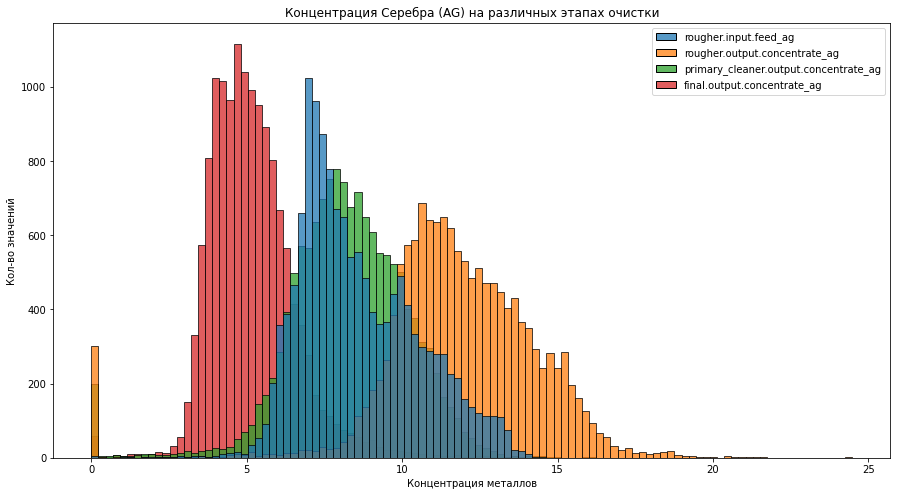

In [20]:
plt.figure(figsize=(15, 8))
sns.histplot(data=data_train[['rougher.input.feed_ag','rougher.output.concentrate_ag', 
            'primary_cleaner.output.concentrate_ag',
            'final.output.concentrate_ag']]).\
set(title='Концентрация Серебра (AG) на различных этапах очистки')
plt.xlabel('Концентрация металлов')
plt.ylabel('Кол-во значений')
plt.show()

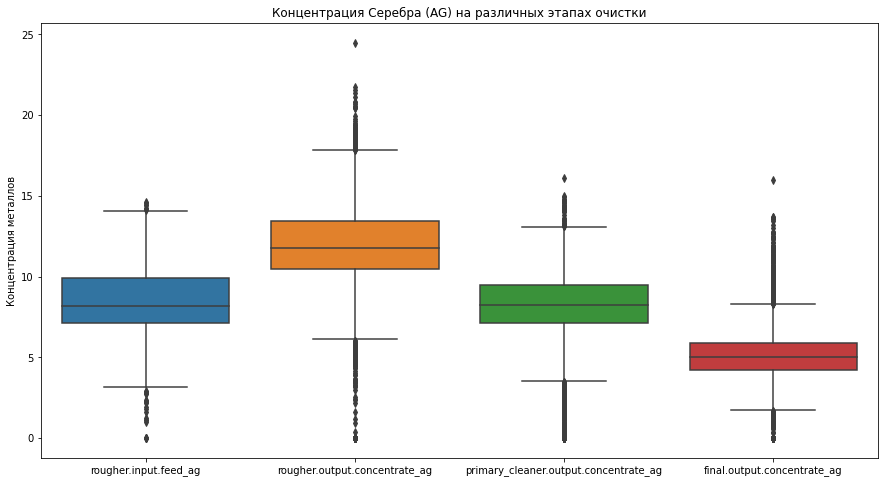

In [21]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=data_train[['rougher.input.feed_ag','rougher.output.concentrate_ag', 
            'primary_cleaner.output.concentrate_ag',
            'final.output.concentrate_ag']]).\
set(title='Концентрация Серебра (AG) на различных этапах очистки')
plt.ylabel('Концентрация металлов')
plt.show()

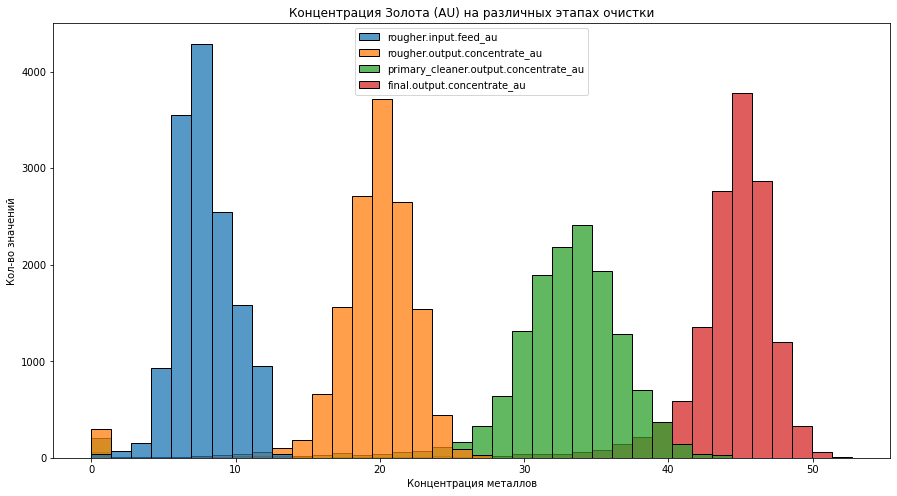

In [22]:
plt.figure(figsize=(15, 8))
sns.histplot(data=data_train[['rougher.input.feed_au','rougher.output.concentrate_au', 
            'primary_cleaner.output.concentrate_au',
            'final.output.concentrate_au']]).\
set(title='Концентрация Золота (AU) на различных этапах очистки')
plt.xlabel('Концентрация металлов')
plt.ylabel('Кол-во значений')
plt.show()

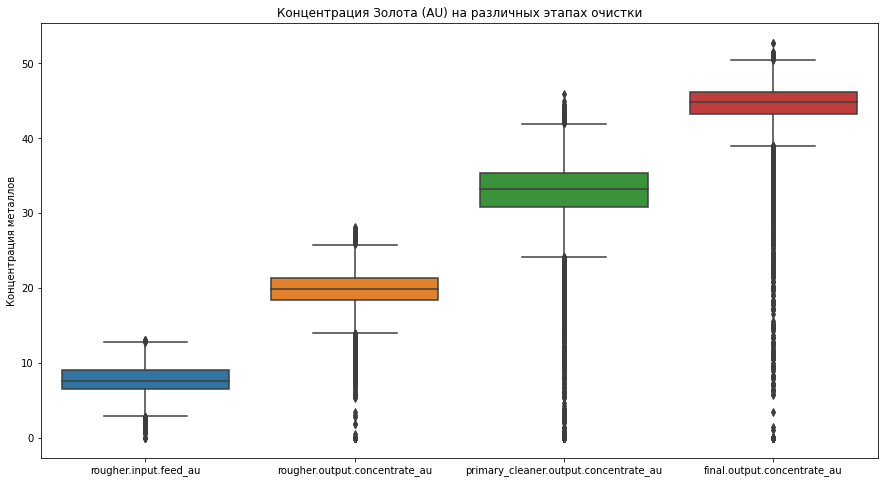

In [23]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=data_train[['rougher.input.feed_au','rougher.output.concentrate_au', 
            'primary_cleaner.output.concentrate_au',
            'final.output.concentrate_au']]).\
set(title='Концентрация Золота (AU) на различных этапах очистки')
plt.ylabel('Концентрация металлов')
plt.show()

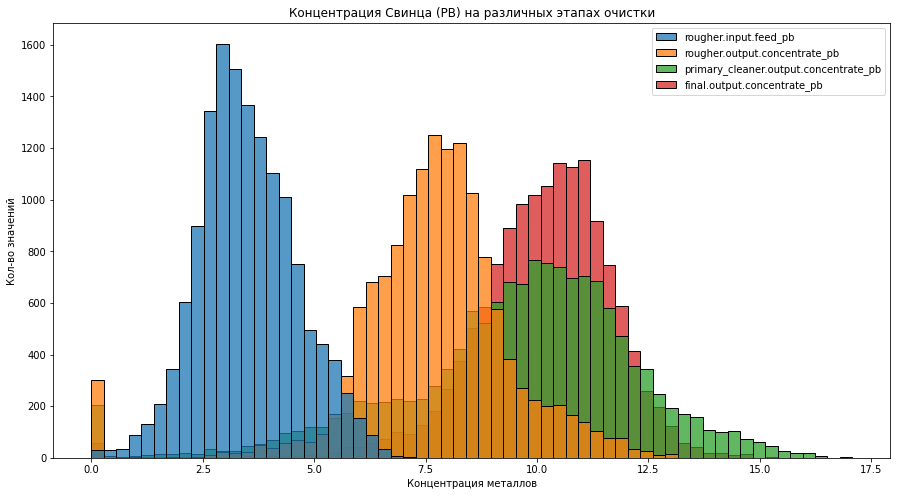

In [24]:
plt.figure(figsize=(15, 8))
sns.histplot(data=data_train[['rougher.input.feed_pb','rougher.output.concentrate_pb', 
            'primary_cleaner.output.concentrate_pb',
            'final.output.concentrate_pb']]).\
set(title='Концентрация Свинца (PB) на различных этапах очистки')
plt.xlabel('Концентрация металлов')
plt.ylabel('Кол-во значений')
plt.show()

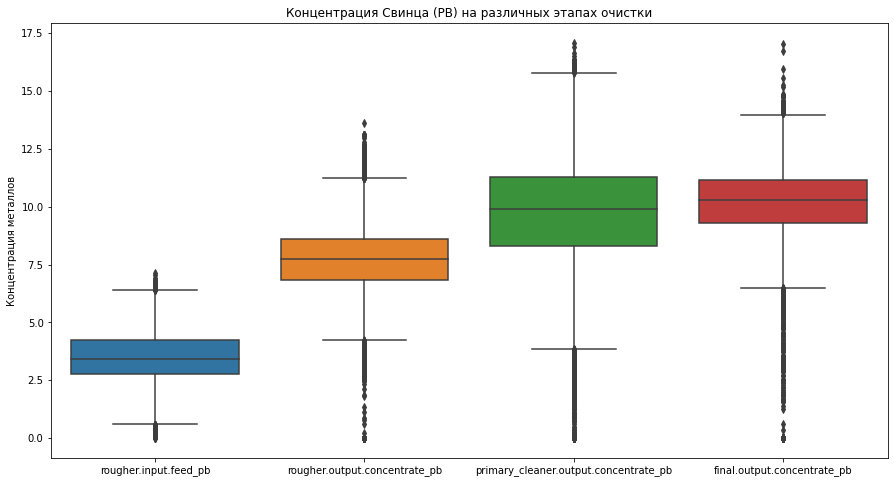

In [25]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=data_train[['rougher.input.feed_pb','rougher.output.concentrate_pb', 
            'primary_cleaner.output.concentrate_pb',
            'final.output.concentrate_pb']]).\
set(title='Концентрация Свинца (PB) на различных этапах очистки')
plt.ylabel('Концентрация металлов')
plt.show()

Видим, что в данных есть выбросы, в дальнейшем избавимся них.

Выводы:


* Концентрация серебра снижается в процессе очистки, и при этом на стадии сырья меньше чем на стадии продукта. 
* Концентрация золота равномерно повышается от флотации до финальной очистки.
* Концентрация свинца значительно повышается от стадии флотации к первичной очистке, и незначительно повышается на стадии финальной очистки.

### Распределения размеров гранул сырья на обучающей и тестовой выборках

Сравним распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

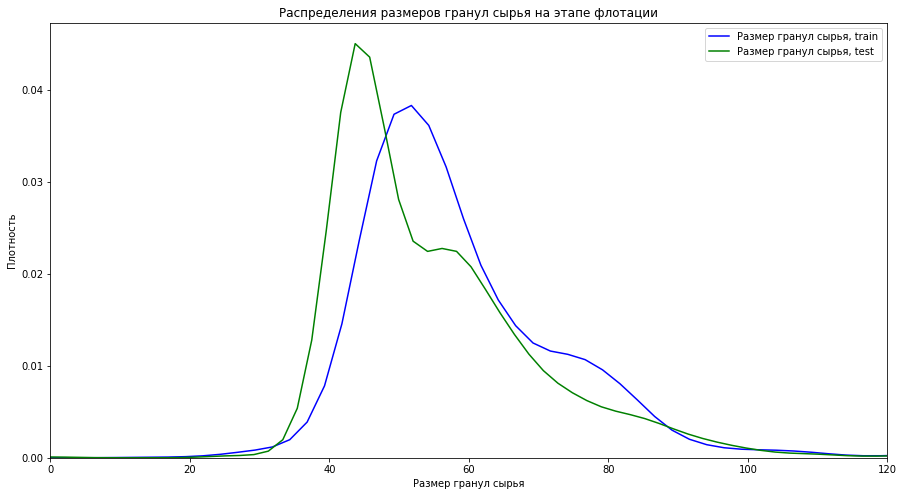

In [26]:
plt.figure(figsize=(15, 8))
plt.xlim(0,120)
sns.kdeplot(data_train['rougher.input.feed_size'], color='blue', label='Размер гранул сырья, train')
sns.kdeplot(data_test['rougher.input.feed_size'], color='green',label='Размер гранул сырья, test')
plt.ylabel('Плотность')
plt.xlabel('Размер гранул сырья')
plt.title('Распределения размеров гранул сырья на этапе флотации')
plt.legend()
plt.show()

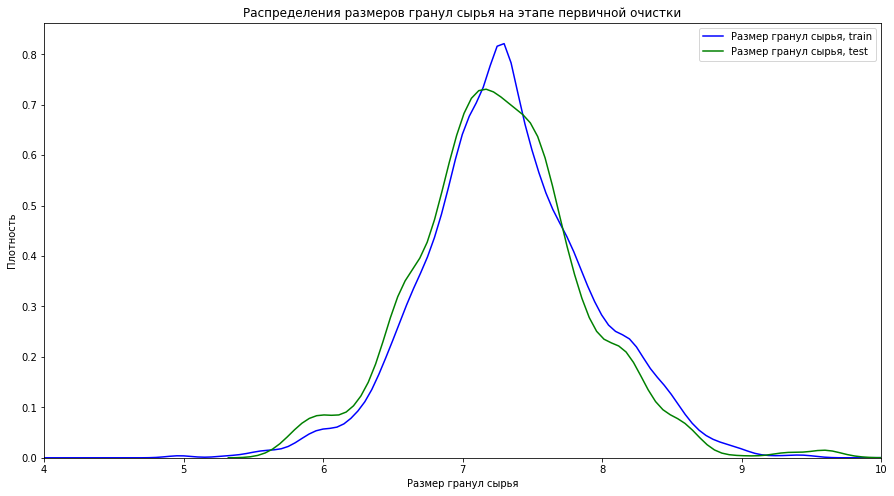

In [27]:
plt.figure(figsize=(15, 8))
plt.xlim(4,10)
sns.kdeplot(data_train['primary_cleaner.input.feed_size'], color='blue', label='Размер гранул сырья, train')
sns.kdeplot(data_test['primary_cleaner.input.feed_size'], color='green',label='Размер гранул сырья, test')
plt.title('Распределения размеров гранул сырья на этапе первичной очистки')
plt.ylabel('Плотность')
plt.xlabel('Размер гранул сырья')
plt.legend()
plt.show()

Вывод: распределения размеров гранул сырья на обучающей и тестовой выборках схожи.

### Суммарная концентрация всех веществ на разных стадиях

Исследуем суммарную концентрацию всех веществ на разных стадиях. 

In [28]:
rougher_input_sum = data_train[['rougher.input.feed_ag', 
            'rougher.input.feed_pb', 
            'rougher.input.feed_sol', 
            'rougher.input.feed_au']].sum(axis=1)

rougher_output_sum = data_train[['rougher.output.concentrate_ag', 
            'rougher.output.concentrate_pb', 
            'rougher.output.concentrate_sol', 
            'rougher.output.concentrate_au']].sum(axis=1)

primary_cleaner_output_sum = data_train[['primary_cleaner.output.concentrate_ag',
                                         'primary_cleaner.output.concentrate_pb',
                                         'primary_cleaner.output.concentrate_sol',
                                         'primary_cleaner.output.concentrate_au']].sum(axis=1)

final_output_sum = data_train[['final.output.concentrate_ag', 
            'final.output.concentrate_pb', 
            'final.output.concentrate_sol', 
            'final.output.concentrate_au']].sum(axis=1)



df = {'rougher_input_feed': rougher_input_sum,
        'rougher_output_concentrate': rougher_output_sum,
      'primary_cleaner_output': final_output_sum,
        'final_output_concentrate': final_output_sum}

data = pd.concat(df, axis = 1)

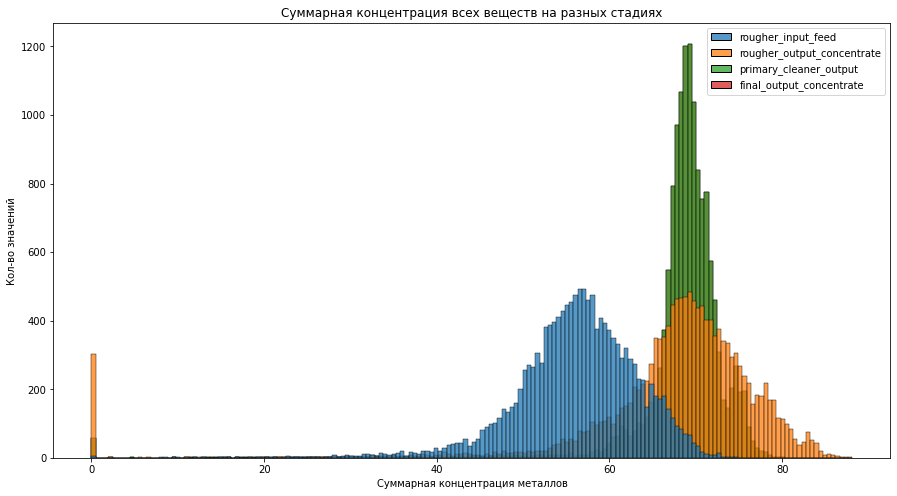

In [29]:
plt.figure(figsize=(15, 8))
sns.histplot(data=data).\
set(title='Суммарная концентрация всех веществ на разных стадиях')
plt.xlabel('Суммарная концентрация металлов')
plt.ylabel('Кол-во значений')
plt.show()

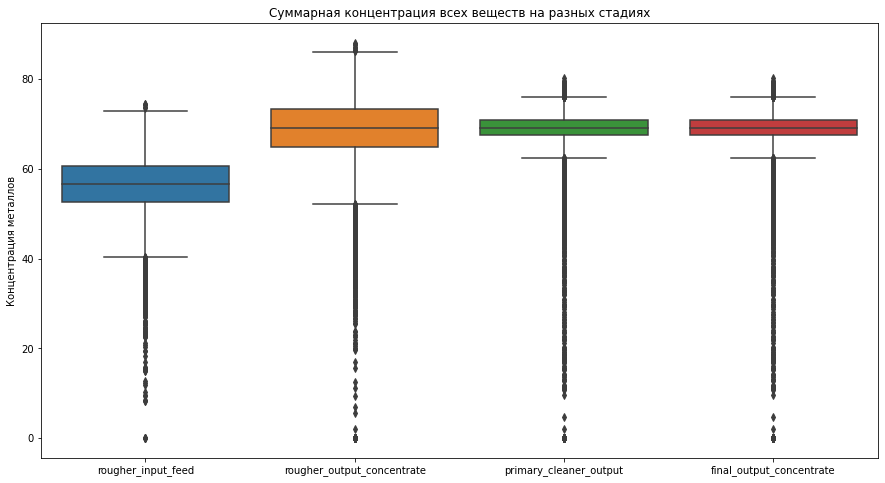

In [30]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=data).\
set(title='Суммарная концентрация всех веществ на разных стадиях')
plt.ylabel('Концентрация металлов')
plt.show()

Из графиков распределения суммарной концентрации видим, что в данных есть аномалии, которые могут влиять на конечные рассчетные характеристики.

Так же видим, что суммарная концентрация металлов на разных этапах процесса меняется не существенно.

Добавим значения с сумарной концентрацией всех веществ на разных стадиях в наш датафрейм, чтобы удалить из данных выбросы.

In [31]:
data_train['rougher_input_sum'] = data_train[['rougher.input.feed_ag', 
            'rougher.input.feed_pb', 
            'rougher.input.feed_sol', 
            'rougher.input.feed_au']].sum(axis=1)

data_train['rougher_output_sum'] = data_train[['rougher.output.concentrate_ag', 
            'rougher.output.concentrate_pb', 
            'rougher.output.concentrate_sol', 
            'rougher.output.concentrate_au']].sum(axis=1)

data_train['primary_cleaner_output_sum'] = data_train[['primary_cleaner.output.concentrate_ag',
                                         'primary_cleaner.output.concentrate_pb',
                                         'primary_cleaner.output.concentrate_sol',
                                         'primary_cleaner.output.concentrate_au']].sum(axis=1)

data_train['final_output_sum'] = data_train[['final.output.concentrate_ag', 
            'final.output.concentrate_pb', 
            'final.output.concentrate_sol', 
            'final.output.concentrate_au']].sum(axis=1)

Удалим из нашей выборки выбросы.

In [32]:
data_train = data_train[data_train['rougher_input_sum']>40]
data_train = data_train[data_train['rougher_output_sum']>50]
data_train = data_train[data_train['primary_cleaner_output_sum']>60]
data_train = data_train[data_train['final_output_sum']>60]

In [33]:
#посмотрим на сколько много данных мы удалили в итоге
data_train_shape, data_train.shape

((14149, 88), (8547, 92))

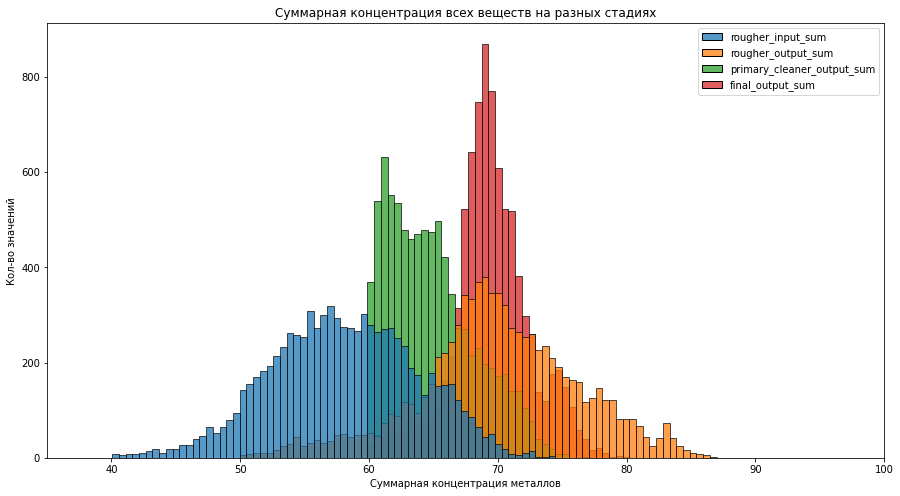

In [36]:
plt.figure(figsize=(15, 8))
plt.xlim(35,100)
sns.histplot(data=data_train[['rougher_input_sum','rougher_output_sum','primary_cleaner_output_sum','final_output_sum']]).\
set(title='Суммарная концентрация всех веществ на разных стадиях')
plt.xlabel('Суммарная концентрация металлов')
plt.ylabel('Кол-во значений')
plt.show()

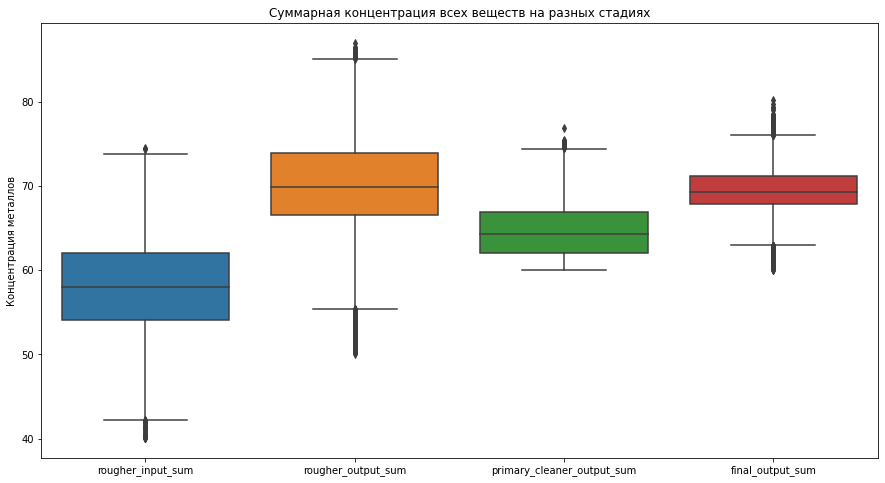

In [35]:
plt.figure(figsize=(15, 8))
plt.xlim(35,100)
sns.boxplot(data=data_train[['rougher_input_sum','rougher_output_sum','primary_cleaner_output_sum','final_output_sum']]).\
set(title='Суммарная концентрация всех веществ на разных стадиях')
plt.ylabel('Концентрация металлов')
plt.show()

Вывод: 
* Мы избавились от анамальных значений суммарной концентрации всех веществ на разных стадиях. 
* Посмотрели как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.
* Сравнили распределения размеров гранул сырья на обучающей и тестовой выборках.
* Исследовали суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

Можем переходить к моделированию.

## Модель

### Функция для вычисления итоговой sMAPE

Напишем функцию для вычисления итоговой sMAPE

In [36]:
#sMAPE
def smape(target, predicted):
    smp = 1/len(target) * np.sum(2 * np.abs(target - predicted) / (np.abs(target) + np.abs(predicted))*100)
    return smp
#Итоговая матрика
def smape_final(rougher, final):
    smp = 0.25*rougher + 0.75*final
    return smp

In [37]:
smape_score = make_scorer(smape, greater_is_better=False)

### Обучение моделей

Обучим разные модели и оценим их качество кросс-валидацией. Выберим лучшую модель и проверем её на тестовой выборке.

Нужно спрогнозировать сразу две величины:
* эффективность обогащения чернового концентрата rougher.output.recovery;
* эффективность обогащения финального концентрата final.output.recovery.

Удалим значения с сумарной концентрацией всех веществ на разных стадиях из нашего датафрейма, поскольку более они нам не нужны.

In [38]:
data_train = data_train.drop(['rougher_input_sum','rougher_output_sum', 'primary_cleaner_output_sum','final_output_sum'],
                             axis=1)

Добавим целевые признаки из полной выборки в тестовую.

In [39]:
data_test = data_test.merge(data_full[['date','final.output.recovery','rougher.output.recovery']],
                            how = 'left', on = 'date')

Удалим лишние переменные.

In [40]:
data_train = data_train.drop(['date'], axis=1)
data_test = data_test.drop(['date'], axis=1)

#удалим из тренировочной выборки те признаки, которых нет в тестовой
data_train = data_train.drop(set(data_train.columns)-set(data_test.columns), axis=1)

In [41]:
# выделим признаки на тренировочной выборке для чернового концентрата (rougher)
features_train_r = data_train.filter(regex='^rougher',axis=1)
features_train_r = features_train_r.drop(['rougher.output.recovery'], axis=1)
target_train_r = data_train['rougher.output.recovery']

# и для финального концентрата (final)
features_train_f = data_train.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
target_train_f = data_train['final.output.recovery']

# #выделим признаки на тестовой выборке для чернового концентрата (rougher)
features_test_r = data_test.filter(regex='^rougher',axis=1)
features_test_r = features_test_r.drop(['rougher.output.recovery'], axis=1)
target_test_r = data_test['rougher.output.recovery']

# и для финального концентрата (final)
features_test_f = data_test.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
target_test_f = data_test['final.output.recovery']

In [42]:
print(features_train_r.shape)
print(features_test_r.shape)

(8547, 22)
(5290, 22)


Проведём масштабирование признаков.

In [43]:
features_r = features_train_r.columns
features_f = features_train_f.columns

scaler_r = StandardScaler()
scaler_r.fit(features_train_r)
features_train_r = scaler_r.transform(features_train_r)
features_test_r = scaler_r.transform(features_test_r)


scaler_f = StandardScaler()
scaler_f.fit(features_train_f)
features_train_f = scaler_f.transform(features_train_f)
features_test_f = scaler_f.transform(features_test_f)

#### Линейная регрессия

In [45]:
model_lr_r = LinearRegression()
model_lr_f = LinearRegression()
scores_r = cross_val_score(model_lr_r, features_train_r, target_train_r, scoring=smape_score, cv=5, n_jobs=-1)
scores_f = cross_val_score(model_lr_f, features_train_f, target_train_f, scoring=smape_score, cv=5, n_jobs=-1)

print('Итоговое sMape для линейной регрессии:', -smape_final(scores_r, scores_f).mean())

Итоговое sMape для линейной регрессии: 9.315576573262943


#### Случайный лес

In [48]:
%%time

model_rf = RandomForestRegressor(random_state=random_state)
parametrs = {'n_estimators': range(10,151,10),
              'max_depth': range(2, 11)}

search_r = GridSearchCV(model_rf, parametrs, cv=3, scoring=smape_score, n_jobs=-1)
search_r.fit(features_train_r, target_train_r)


search_f = GridSearchCV(model_rf, parametrs, cv=3, scoring=smape_score, n_jobs=-1)
search_f.fit(features_train_f, target_train_f)

CPU times: user 1h 15min 32s, sys: 8.58 s, total: 1h 15min 40s
Wall time: 1h 16min 1s


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=12345),
             n_jobs=-1,
             param_grid={'max_depth': range(2, 11),
                         'n_estimators': range(10, 151, 10)},
             scoring=make_scorer(smape, greater_is_better=False))

In [49]:
print(search_r.best_params_)
print(search_f.best_params_)

{'max_depth': 9, 'n_estimators': 10}
{'max_depth': 7, 'n_estimators': 20}


In [50]:
print('sMape для cлучайного леса:', -smape_final(search_r.best_score_,search_f.best_score_))

sMape для cлучайного леса: 8.337200737880805


Вывод: показатели случайного леса лучше, чем у линейной регрессии.

### Тестирование модели

In [51]:
model_rf_r = RandomForestRegressor(max_depth=9, n_estimators=10, random_state=random_state)
model_rf_f = RandomForestRegressor(max_depth=7, n_estimators=20, random_state=random_state)

model_rf_r.fit(features_train_r, target_train_r)
model_rf_f.fit(features_train_f, target_train_f)

predicted_test_r = model_rf_r.predict(features_test_r)
predicted_test_f = model_rf_f.predict(features_test_f)

scores_test_r = smape(target_test_r,predicted_test_r)
scores_test_f = smape(target_test_f,predicted_test_f)

print('Итоговое sMape для случайного леса на тестовой выборке:', smape_final(scores_test_r, scores_test_f))

Итоговое sMape для случайного леса на тестовой выборке: 8.983458196323497


Выведем информацию по важности признаков, полученных моделей.

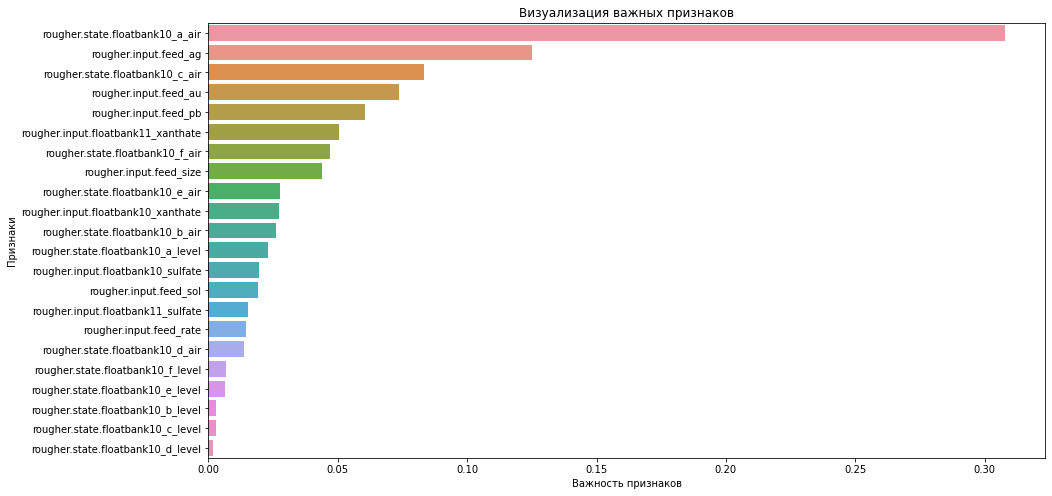

In [53]:
feature_imp = pd.Series(model_rf_r.feature_importances_,index=features_r).sort_values(ascending=False)

plt.figure(figsize=(15, 8))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Важность признаков')
plt.ylabel('Признаки')
plt.title('Визуализация важных признаков')
plt.show()

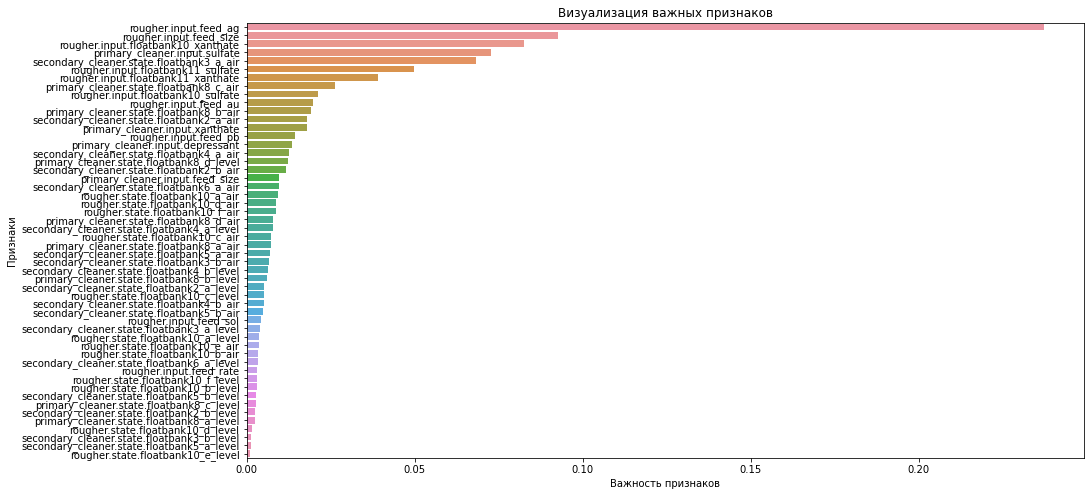

In [54]:
feature_imp = pd.Series(model_rf_f.feature_importances_,index=features_f).sort_values(ascending=False)

plt.figure(figsize=(15, 8))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Важность признаков')
plt.ylabel('Признаки')
plt.title('Визуализация важных признаков')
plt.show()

Вывод:

Наиболее важным признаком для прогнозирования эффективности обогащения чернового концентрата (rougher.output.recovery) является rougher.state.floatbank10_a_air.

Наиболее важным признаком для прогнозирования эффективности обогащения финального концентрата (final.output.recovery) является rougher.input.feed_ag.

Сравним наши модели с примитивными моделями.

In [55]:
dummy_model_r = DummyRegressor(strategy="mean")
dummy_model_f = DummyRegressor(strategy="mean")
dummy_model_r.fit(features_train_r, target_train_r)
dummy_model_f.fit(features_train_f, target_train_f)
test_predictions_r = dummy_model_r.predict(features_test_r)
test_predictions_f = dummy_model_f.predict(features_test_f)

print('Итоговое sMAPE для DummyRegressor:',\
smape_final(smape(target_test_r, test_predictions_r), smape(target_test_f, test_predictions_f)))

Итоговое sMAPE для DummyRegressor: 9.214825433728366


Наши модели показали метрику лучше чем примитивные модели.

## Итоговый вывод

Мы провели исследование данных:
* Посмотрели как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.
* Сравнили распределения размеров гранул сырья на обучающей и тестовой выборках.
* Исследовали суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.
    
Обучили модели случайного леса для прогнозирования сразу двух величин:
* эффективность обогащения чернового концентрата rougher.output.recovery;
* эффективность обогащения финального концентрата final.output.recovery.